In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import datetime as dt
from datetime import datetime as dtdt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set()

In [2]:
path = "/Users/iomacbookair2/Documents/lab/DEIM2023/tweet_csv/221213_ann_tue.csv"
df = pd.read_csv((path))
df.sort_values(by = 'created_at', ascending = True, inplace = True)
df = df.reset_index(drop=True)
df['created_at'] = pd.to_datetime(df['created_at'])
df


,created_at,text,author_id,username
0,2022-12-14 01:00:00,#星野源ANN,975071724633903104,ino_yk2
1,2022-12-14 01:00:00,#星野源ANN,1004966782547836928,Jr_TAKOYAKI
2,2022-12-14 01:00:00,#星野源ANN,1273098105483919363,soy_sauce_bean
3,2022-12-14 01:00:00,#星野源ANN,1088365942176804864,Continues_POP
4,2022-12-14 01:00:00,#星野源ANN,1527281573216673792,JACK__73_
...,...,...,...,...
3343,2022-12-14 03:03:54,年末かぁー。 これからいろいろお楽しみあるから、あっという間に1月よね♪♪ 土井さん楽しみだ...,269834963,yuumikaze
3344,2022-12-14 03:03:59,#星野源ANN 国性のハガキって手元に何枚か来てるんやね。,4817010288,hkr_weekend
3345,2022-12-14 03:04:28,お疲れさま( ^^) _U~~ 今夜もありがとうございました♡ #星野源ANN,817389905642852352,shabon_nao
3346,2022-12-14 03:04:33,残HP0.2！！！！おうち帰って充電してくれ！！！🥺 #星野源ANN,1070188205855526913,hamukosun_


In [3]:
c_df = df.set_index('created_at').resample('T').count()
cnt = pd.DataFrame(
    {'created_at' : c_df.index.strftime('%Y-%m-%d %H:%M:%S'), 'counts' : c_df['text'].values})
cnt

,created_at,counts
0,2022-12-14 01:00:00,202
1,2022-12-14 01:01:00,118
2,2022-12-14 01:02:00,62
3,2022-12-14 01:03:00,62
4,2022-12-14 01:04:00,68
...,...,...
120,2022-12-14 03:00:00,45
121,2022-12-14 03:01:00,27
122,2022-12-14 03:02:00,16
123,2022-12-14 03:03:00,12


In [4]:
filename =  "count_221213_ann_tue.csv"
cnt.to_csv(filename, encoding = 'utf-8-sig')

In [5]:
max(cnt['counts']), min(cnt['counts'])

(202, 3)

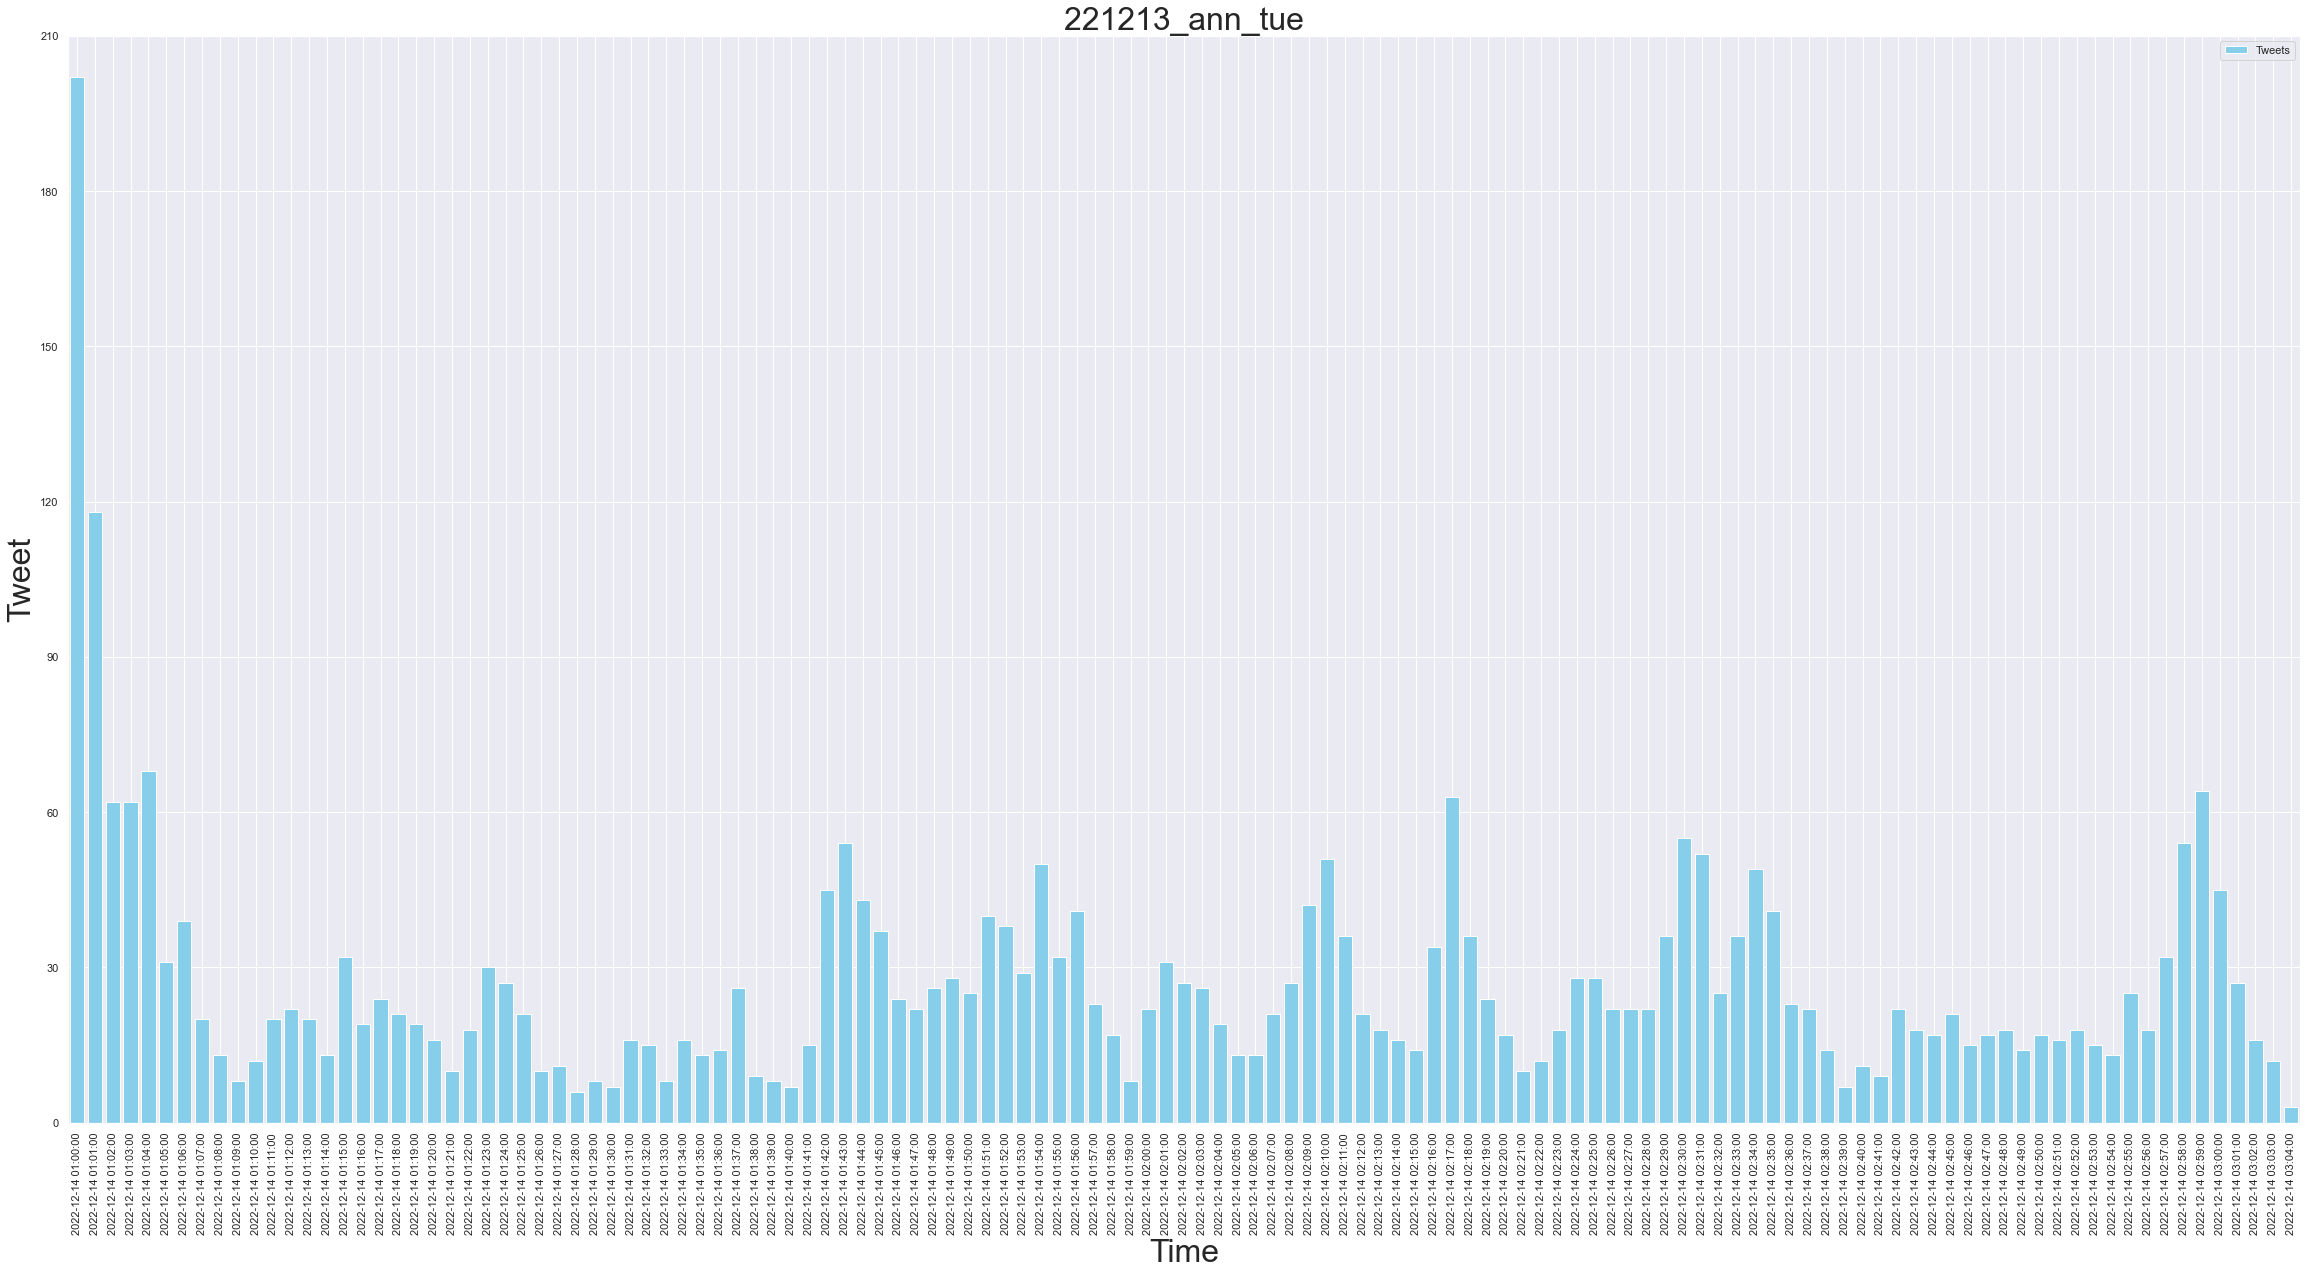

In [7]:
time = cnt['created_at']
tweets = cnt['counts']
fig = plt.figure(1, figsize=(40,20)) # 描画領域作成

c1,c2 = "skyblue", "black"
l1,l2 = "Tweets","Score"
axes = fig.add_subplot(111) # Axes作成
axes.set_xlabel("Time", fontsize = 32)
axes.set_ylabel("Tweet", fontsize = 32)
axes.bar(time, tweets, color=c1, label=l1)# 描画
axes.set_title("221213_ann_tue", fontsize = 32) # タイトル

# x軸
axes.tick_params(axis='x', rotation=90) # 軸目盛ラベルの回転
axes.set_xlim(-0.5, 124.5) # グラフの横幅と全体の端を揃える

# y軸
axes.set_ylim(0, 210) # y軸の範囲を指定する
start = 0
end = 211
stepsize = 30
axes.yaxis.set_ticks(np.arange(start, end, stepsize)) # y軸の間隔を指定する

axes.legend(loc=1)
# plt.savefig("thetrad220124.")